# Resolvedor de puzzles

Queremos construir un programa que automatice la resolución de puzzles de tamaño aleatorio y con un número de piezas cualquiera. Además vamos a ver como el puzzle se va completando cada vez que se tienen dos piezas que encajan.

Para ello se van a diseñar 2 componentes principales:

El primero es el puzzle, es decir, un tablero de n piezas que podrán estar ya emparejadas con sus vecinas o no. El puzzle está formado piezas, a las que habrá que darles una representación adecuada para poderlas identificar dentro del tablero y saber a qué imagen del puzzle corresponden.

Luego se tendrá una bolsa/generador que proporcionará las piezas del puzzle de forma aleatoria para que las vayamos encajando según las recibamos.

Puedes pensarlo como si tuvieses que realizar un puzzle de verdad.

Este ejercicio sirve como introducción a las clases de python para representar tipos abstractos de datos y proporcionarles métodos de utilidad. Además se introduce alguna librería importante como numpy para trabajar con vectores y una de las herramientas más útiles para trabajar en python, las listas por comprensión.


Tranquilos, ya nos hemos pegado con las cosas más tontas, todo lo que queda es la parte más didáctica y de disfrutar. Tanto el generador de piezas como parte del tablero están hechos


In [24]:
# Variables que usaremos a lo largo del ejercicio

# URL para la obtención de imágenes random
base_url = "https://picsum.photos/"

# Dimensión de la imagen
width, height = 250, 500

# Piezas del puzzle
piezas_fila, piezas_columna = 10, 10
num_piezas = piezas_fila*piezas_columna

Para poder visualizar mejor el progreso de resolución, definiremos un tablero de fondo sobre el que poner las fichas


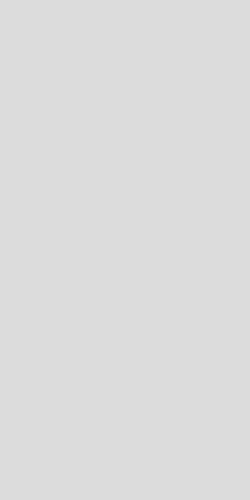

In [25]:
# Librería de visualización y edición de imágenes
import cv2
# Como estamos en google colab, necesitamos esta librería para visualizar imágenes
from google.colab.patches import cv2_imshow
import numpy as np

image = np.zeros((height, width, 3), np.uint8)
image[:] = (220, 220, 220)
cv2.imwrite('default.jpg', image)
cv2_imshow(image)

## Imágenes que vamos a emplear
Descarga de una imagen random con los parámetros que hemos definido previamente

In [26]:
!wget --output-document=puzzle.jpg $base_url$width/$height

--2023-12-14 11:52:56--  https://picsum.photos/250/500
Resolving picsum.photos (picsum.photos)... 104.26.4.30, 104.26.5.30, 172.67.74.163, ...
Connecting to picsum.photos (picsum.photos)|104.26.4.30|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://fastly.picsum.photos/id/550/250/500.jpg?hmac=3IRnVsBcTYcMvOuxOXJEkrEsjCts50Zj68n4rRuEVvA [following]
--2023-12-14 11:52:56--  https://fastly.picsum.photos/id/550/250/500.jpg?hmac=3IRnVsBcTYcMvOuxOXJEkrEsjCts50Zj68n4rRuEVvA
Resolving fastly.picsum.photos (fastly.picsum.photos)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to fastly.picsum.photos (fastly.picsum.photos)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7888 (7.7K) [image/jpeg]
Saving to: ‘puzzle.jpg’

puzzle.jpg          100%[===================>]   7.70K  --.-KB/s    in 0s      

2023-12-14 11:52:56 (90.6 MB/s) - ‘puzzle.jpg’ saved [7888/7888]



Veamos la imagen que hemos descargado junto con una parte de la misma

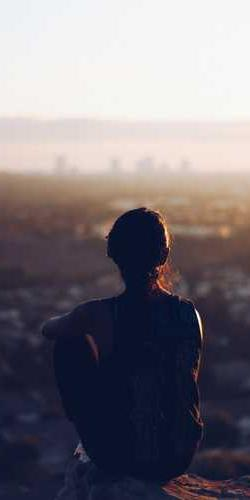

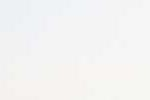

In [27]:
img = cv2.imread('./puzzle.jpg')
cv2_imshow(img)
cropped = img[0:100, 0:150]
cv2_imshow(cropped)

## Cómo tratamos las imágenes en el puzzle
Carga y división de las imágenes en piezas

In [28]:
import math
# Carga de imágenes
imagen = cv2.imread('./puzzle.jpg')
imagen_default = cv2.imread('./default.jpg')

# Dimensiones de las piezas
width_pieza = int(width/piezas_fila)
height_pieza = int(height/piezas_columna)

# División de las imágenes en listas de piezas
imagen_dividida = [ (imagen[y_start:y_start+height_pieza, x_start:x_start+width_pieza], x_start, y_start) for x_start in range(0, width, width_pieza) for y_start in range(0, height, height_pieza)]
imagen_default_dividida = [ (imagen_default[y_start:y_start+height_pieza, x_start:x_start+width_pieza], x_start, y_start) for x_start in range(0, width, width_pieza) for y_start in range(0, height, height_pieza)]

Función de utilidad para la reconstrucción de una imágen

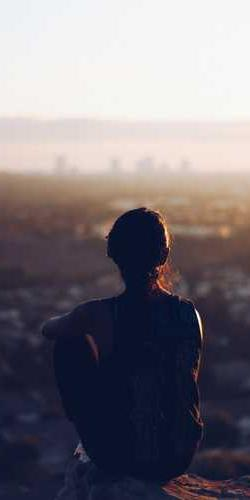

In [29]:
def reconstruir_imagen(piezas, dim):
  """ Reconstruye una imagen de dimensión `dim` dada una lista de piezas `piezas` """

  w, h = dim
  reconstructed_image = np.zeros((h, w, 3), dtype=np.uint8)
  # Paste each cropped image onto the canvas
  for idx, cropped_image in enumerate(piezas):
      # Assume each entry in cropped_images is a tuple (cropped_img, x, y)
      cropped_img, x, y = cropped_image
      # Get the dimensions of the cropped image
      cropped_height, cropped_width, _ = cropped_img.shape

      # Paste the cropped image onto the canvas
      reconstructed_image[y:y+cropped_height, x:x+cropped_width] = cropped_img
  return reconstructed_image

# Display the reconstructed image
cv2_imshow(reconstruir_imagen(imagen_dividida, (width, height)))

## Definición y declaración del Puzzle

Definición de una pieza del tablero

Primer ejercicio


In [30]:
"""
COMPLETAR
Representación de una pieza del tablero

Necesitamos saber qué imagen contiene la pieza, alguna forma de identificarla en el tablero y como emparejarla con otras
"""
class Pieza:
  # Quizás necesitemos que pasen algún parámetro
  def __init__(self):
    # Piensa qué atributos debería tener una pieza para luego poder trabajar con ella en el tablero

Definición del tablero/puzzle

Enlaces de interés 😏:
[Acceso a información en numpy]( https://numpy.org/doc/stable/reference/generated/numpy.ndarray.item.html)


In [31]:
import random
import uuid
import numpy as np
from copy import deepcopy

np.random.seed(127)
dtype = [('object_value', object), ('bool_value', bool)]

# Construir el tablero de piezas emparejadas
class Tablero:
  def __init__(self, dim):
    self.tablero = np.empty(dim, dtype=dtype) # guarda (id_pieza, pintada)
    self.h = dim[0]
    self.w = dim[1]
    self.poner_ids()

  def poner_ids(self):
    """ Asigna ids a todas las piezas del puzzle """
    ids_puestos = {} # id -> pos
    for x in range(self.h):
      for y in range(self.w):
        id = str(uuid.uuid4())
        while id in ids_puestos:
          id = str(uuid.uuid4())
        ids_puestos[id] = (x, y)

    for id in ids_puestos:
      self.tablero.itemset(ids_puestos[id], (id, False))

  def pieza_en_pos(self, p):
    """
    COMPLETAR
    Dada una posición en el tablero `p` devuelve la imagen relacionada con la pieza en esa posición
    """

  def vecinos_de_pos(self, p):
    """
    Devuelve las ids de los vecinos de una pieza
    Si se encuentra en el borde del tablero, el vecino correspondiente valdrá None
    """
    (p_x, p_y) = p
    return [
        self.tablero.item((p_x, p_y-1))[0] if p_y > 0 else None,
        self.tablero.item((p_x, p_y+1))[0] if p_y < self.w-1 else None,
        self.tablero.item((p_x-1, p_y))[0] if p_x > 0 else None,
        self.tablero.item((p_x+1, p_y))[0] if p_x < self.h-1 else None,
    ]

  def esta_completo(self):
    """
    COMPLETAR
    Devuelve True si todas las piezas del puzzle están colocadas
    Recordad que el tablero está formado por tuplas (id_pieza: int, pieza_colocada: bool)
    """

  def pintar(self, pieza):
    """ Toma una pieza y la pinta en el tablero """
    for x, row in enumerate(self.tablero):
      for y, pieza_tab in enumerate(row):
        if pieza_tab[0] == pieza.id:
          self.tablero.itemset((x, y), (pieza.id, True))

  def actualizar(self):
    """ Muestra el estado actual del puzzle """
    imagen_a_pintar = deepcopy(imagen_default_dividida)
    for i, pieza in enumerate(self.tablero.flatten()):
      if pieza[1]:
        imagen_a_pintar[i] = imagen_dividida[i]
    cv2_imshow(reconstruir_imagen(imagen_a_pintar, (self.w*width_pieza, self.h*height_pieza)))


Bolsa de piezas del puzzle

In [32]:
def generar_piezas(dim_imagen, t):
  """
  Simula la bolsa de donde se cojen las piezas del puzzle.
  Cada vez que se llama a esta función, devuelve una pieza aleatoria del puzzle.
  Necesita saber que dimensiones tiene el puzzle
  """
  (h, w) = dim_imagen
  copia_imagen = deepcopy(imagen_dividida)
  random.shuffle(copia_imagen)
  for i in range(h*w):
    img_pieza, x, y = copia_imagen[i]
    y = int(y/height_pieza)
    x = int(x/width_pieza)
    print((x,y))
    id_pieza = t.pieza_en_pos((x, y))
    # Instancias la Pieza con el id generado, la imagen de la matriz y los vecinos con la matriz de ids
    siguiente_pieza = Pieza(img_pieza, id_pieza, t.vecinos_de_pos((x, y)))
    # Devuelves la instancia de Pieza
    yield siguiente_pieza

Veamos como se generan las piezas del puzzle

In [33]:
test_dim = (piezas_fila, piezas_columna)
tablero = Tablero(test_dim)
for pieza in generar_piezas(test_dim, tablero):
  cv2_imshow(pieza.imagen_pieza)

(5, 5)


(0, 5)


(0, 8)


(4, 4)


(1, 2)


(4, 1)


(2, 5)


(2, 8)


(1, 6)


(7, 6)


(5, 3)


(3, 9)


(4, 3)


(9, 6)


(6, 6)


(8, 3)


(7, 2)


(8, 2)


(7, 3)


(7, 1)


(4, 8)


(1, 5)


(4, 0)


(8, 1)


(4, 2)


(9, 2)


(3, 3)


(5, 4)


(3, 8)


(3, 2)


(9, 7)


(7, 7)


(9, 4)


(7, 8)


(6, 9)


(8, 7)


(3, 6)


(0, 1)


(3, 5)


(2, 9)


(2, 0)


(5, 2)


(1, 1)


(6, 1)


(4, 5)


(8, 9)


(2, 3)


(3, 0)


(9, 1)


(2, 6)


(2, 4)


(1, 7)


(9, 8)


(7, 4)


(8, 5)


(2, 7)


(2, 2)


(6, 2)


(8, 4)


(3, 7)


(4, 6)


(0, 3)


(5, 9)


(0, 7)


(4, 9)


(1, 4)


(0, 9)


(6, 0)


(9, 9)


(9, 3)


(7, 0)


(6, 7)


(6, 5)


(2, 1)


(9, 5)


(4, 7)


(1, 9)


(0, 2)


(3, 4)


(8, 0)


(6, 3)


(6, 4)


(6, 8)


(5, 6)


(8, 6)


(1, 8)


(1, 0)


(3, 1)


(5, 7)


(7, 9)


(8, 8)


(0, 4)


(5, 1)


(5, 8)


(0, 0)


(5, 0)


(9, 0)


(7, 5)


(1, 3)


(0, 6)


Función principal del resolvedor

(2, 3)


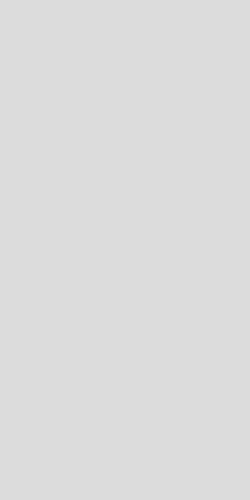

(8, 3)


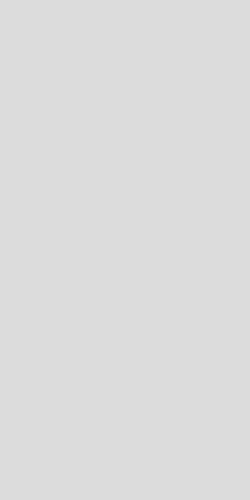

(9, 7)


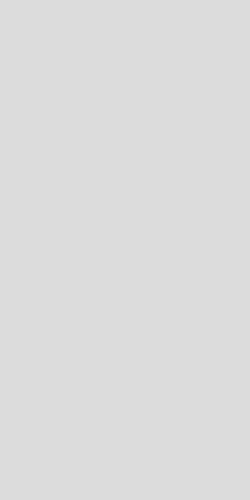

(3, 6)


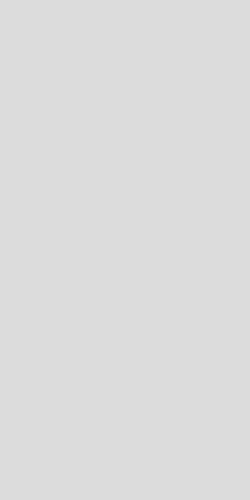

(8, 5)


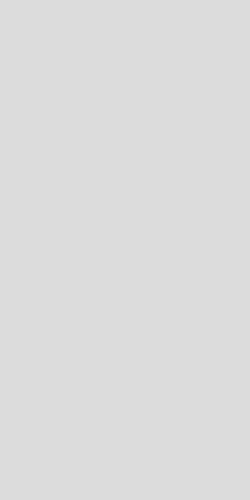

(7, 5)


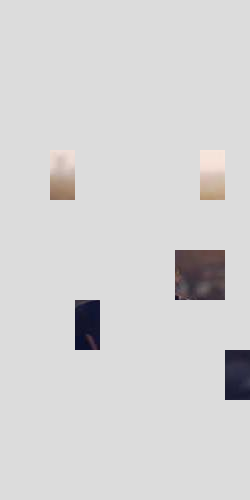

(2, 9)


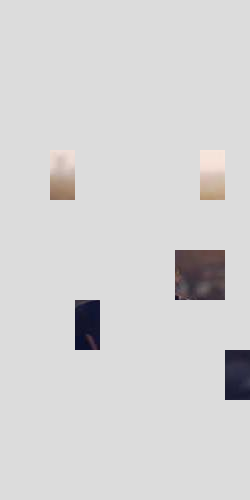

(4, 4)


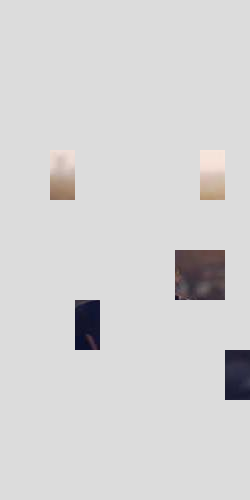

(0, 5)


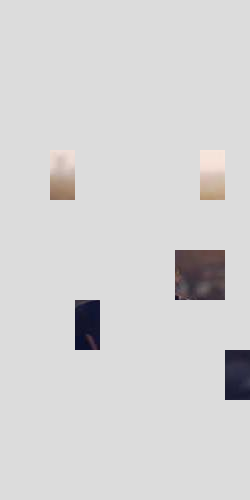

(0, 8)


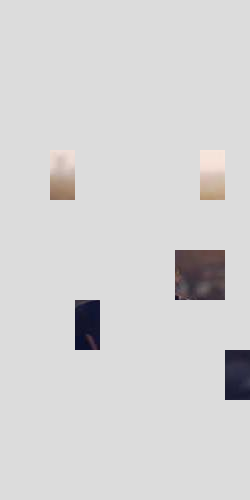

(9, 9)


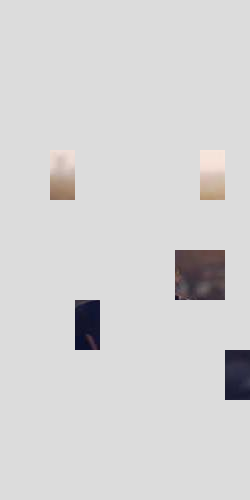

(1, 3)


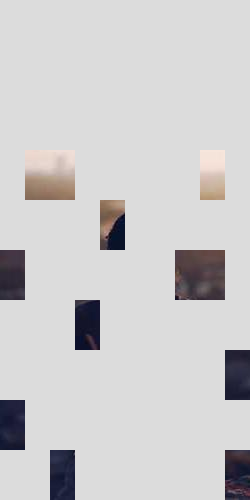

(8, 2)


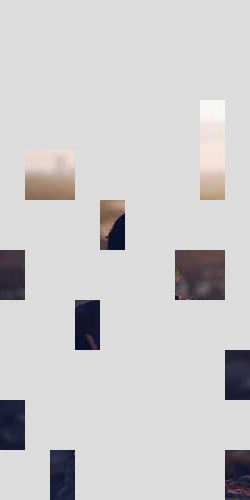

(0, 7)


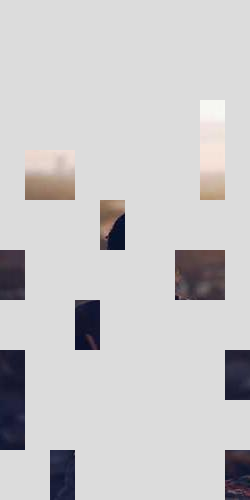

(2, 6)


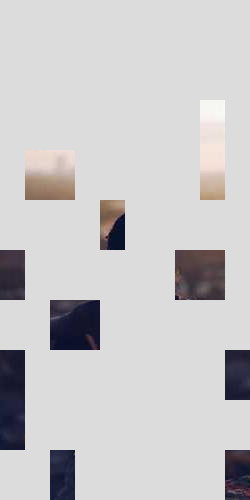

(9, 3)


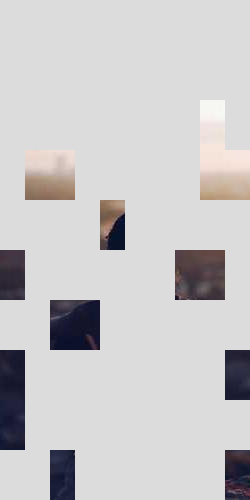

(2, 2)


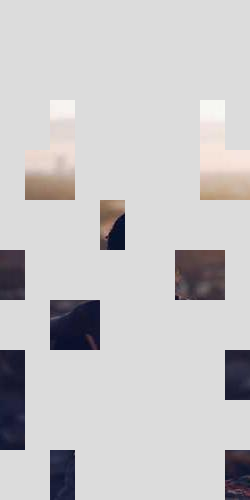

(8, 6)


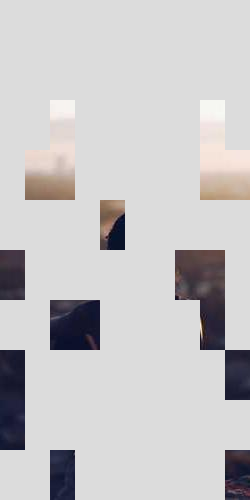

(7, 3)


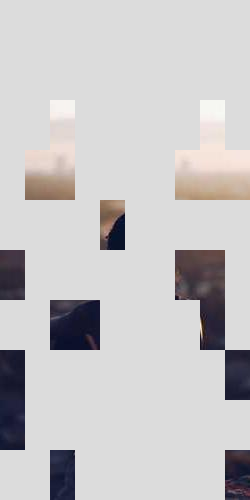

(4, 8)


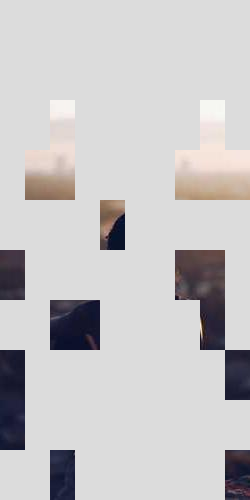

(3, 7)


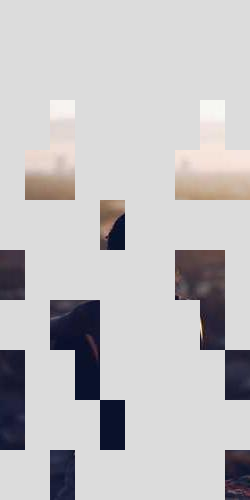

(0, 6)


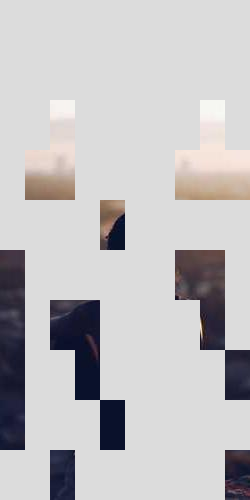

(3, 0)


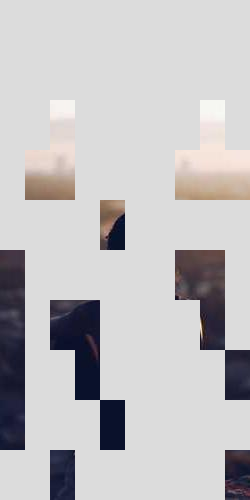

(8, 7)


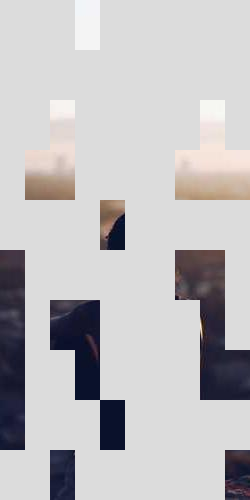

(6, 2)


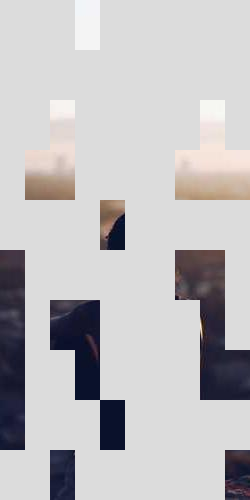

(9, 0)


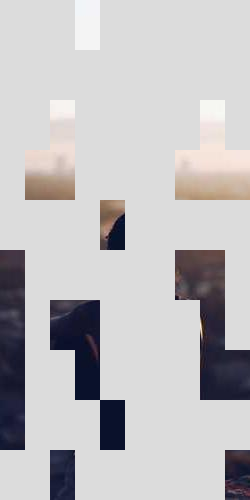

(5, 7)


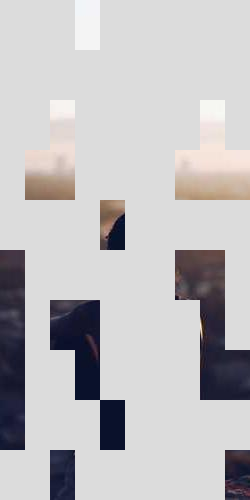

(4, 1)


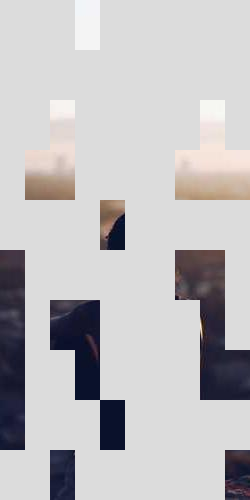

(2, 8)


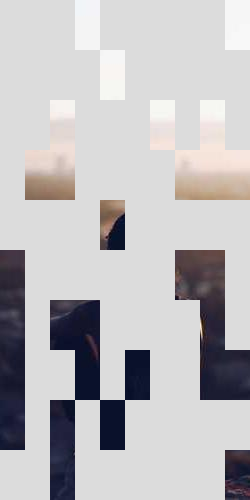

(6, 3)


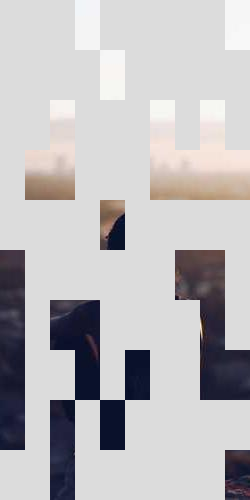

(7, 6)


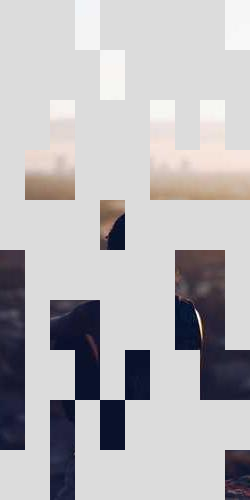

(1, 7)


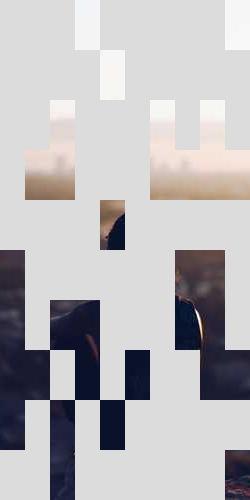

(5, 4)


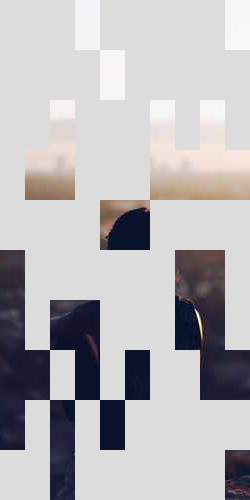

(6, 7)


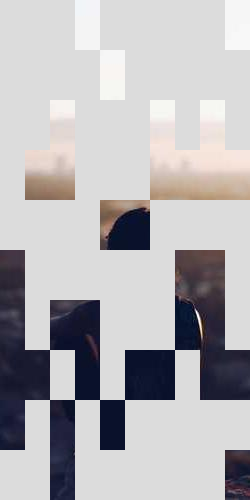

(3, 3)


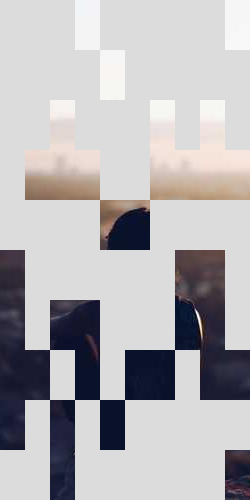

(3, 2)


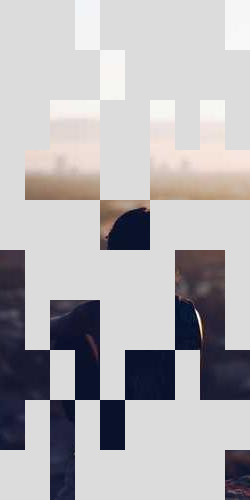

(9, 2)


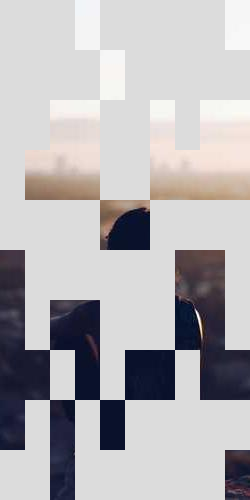

(3, 8)


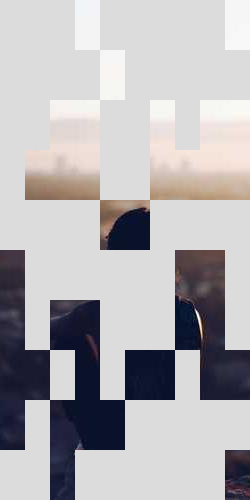

(9, 6)


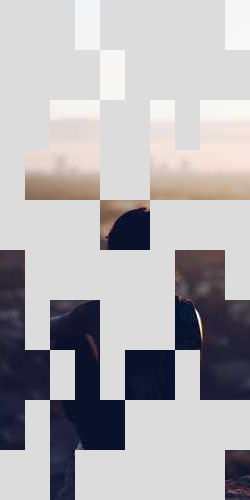

(3, 5)


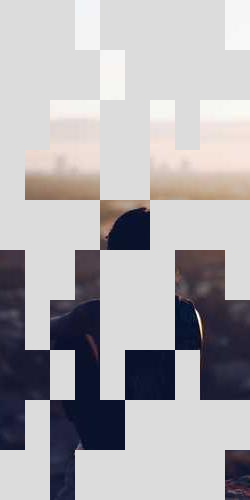

(6, 8)


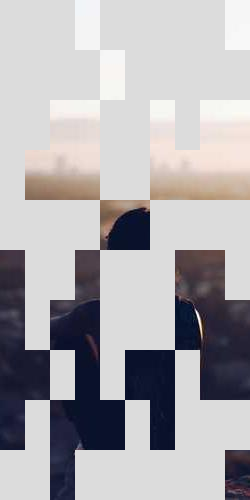

(0, 1)


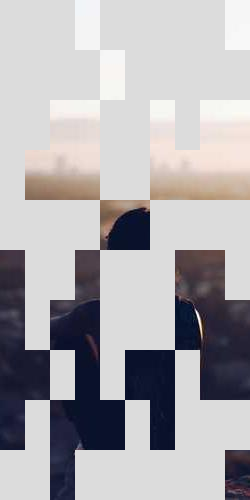

(5, 3)


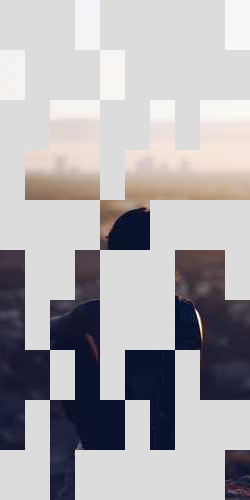

(7, 2)


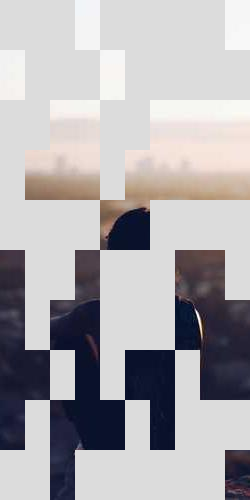

(4, 2)


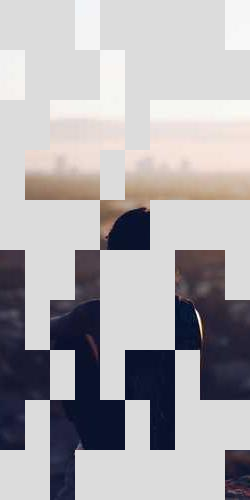

(5, 6)


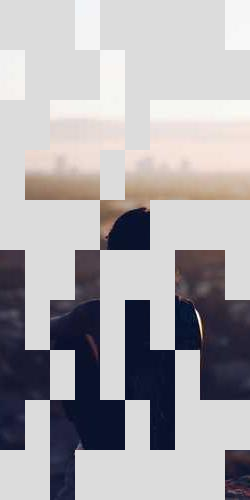

(1, 6)


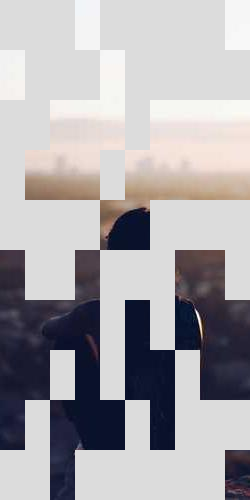

(1, 5)


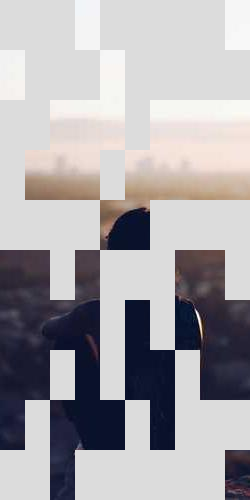

(9, 5)


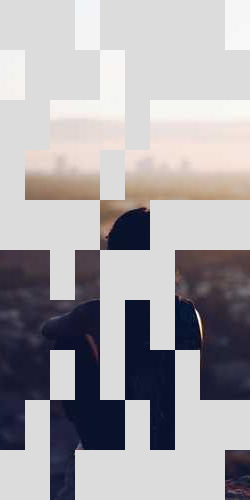

(5, 9)


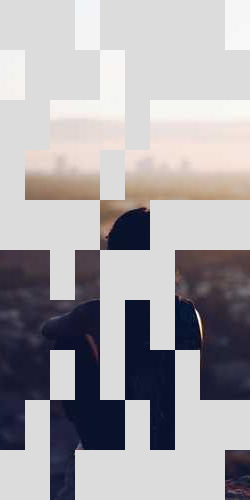

(2, 0)


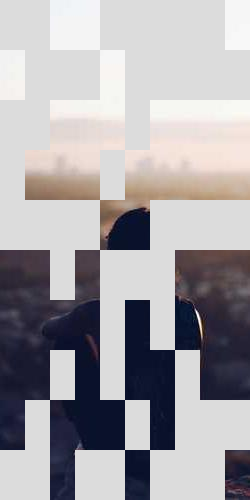

(8, 1)


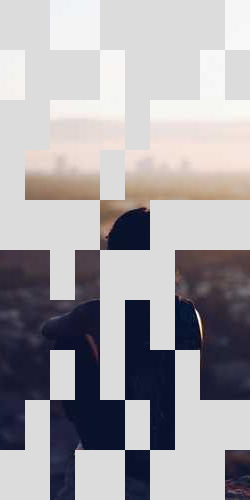

(8, 9)


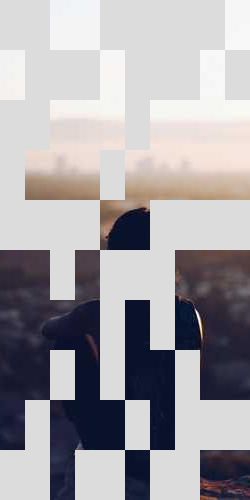

(4, 3)


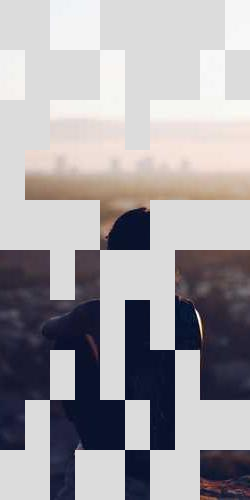

(4, 7)


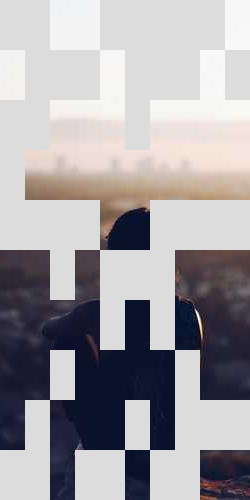

(2, 5)


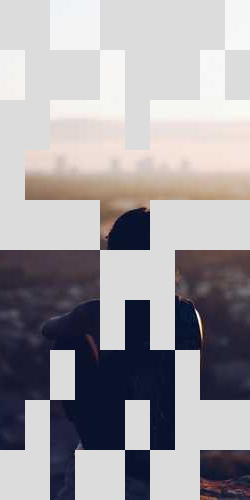

(8, 0)


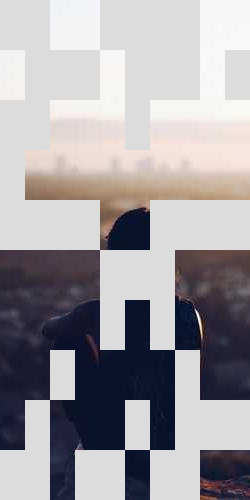

(6, 5)


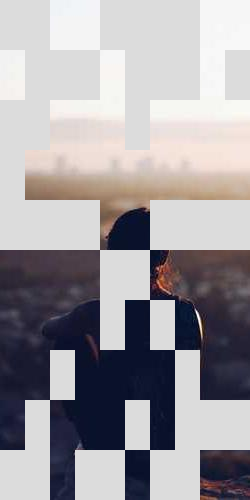

(9, 1)


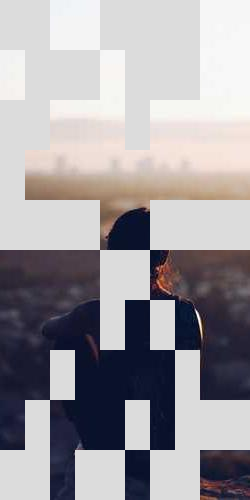

(4, 9)


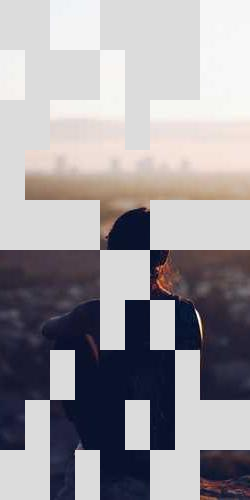

(4, 6)


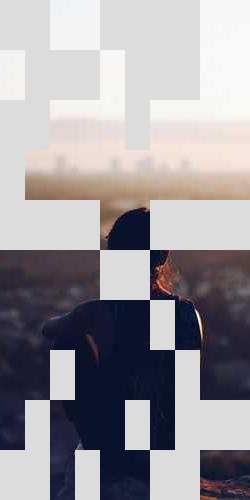

(6, 9)


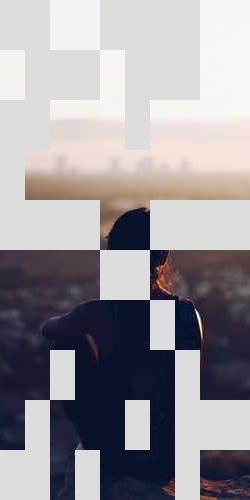

(1, 1)


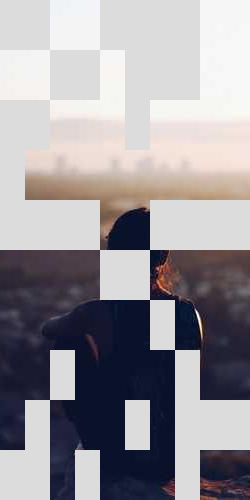

(7, 9)


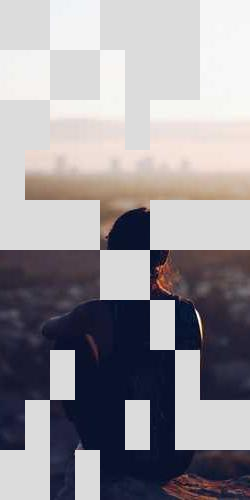

(3, 9)


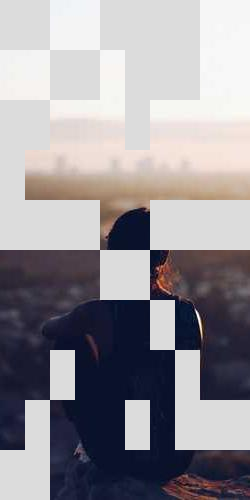

(6, 4)


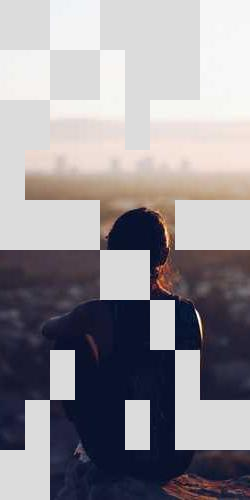

(0, 2)


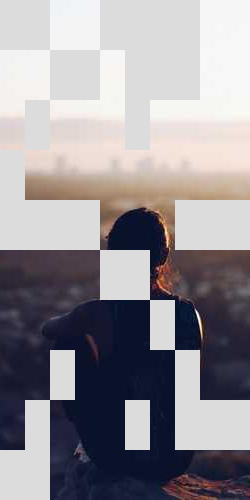

(7, 4)


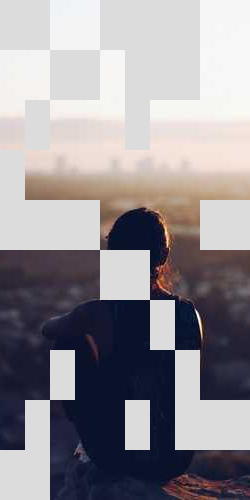

(7, 0)


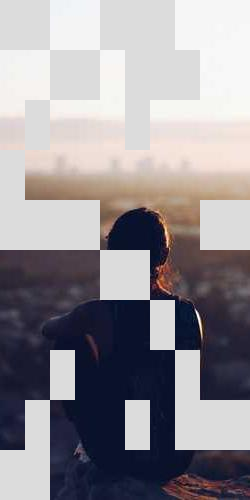

(2, 4)


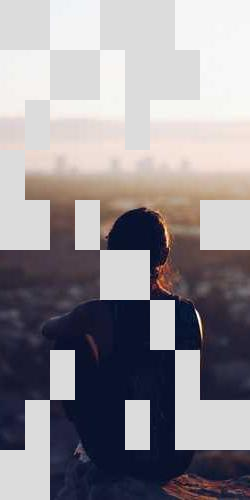

(1, 8)


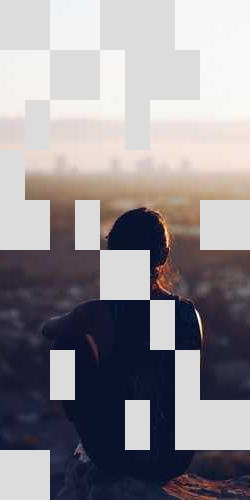

(5, 8)


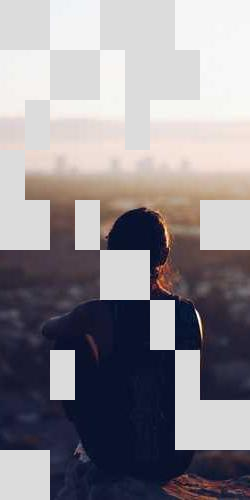

(6, 0)


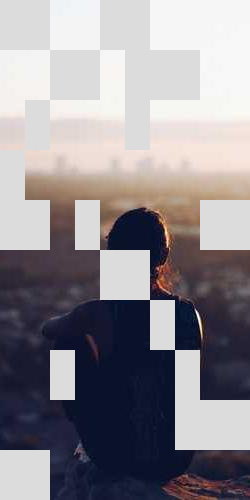

(5, 0)


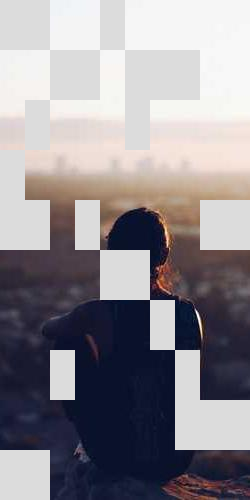

(0, 0)


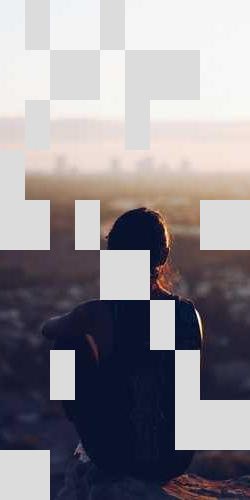

(1, 2)


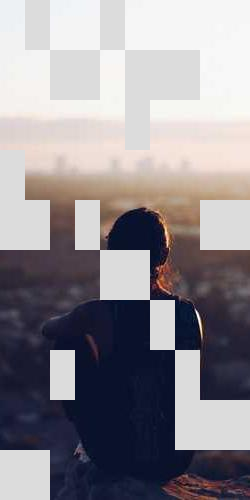

(2, 7)


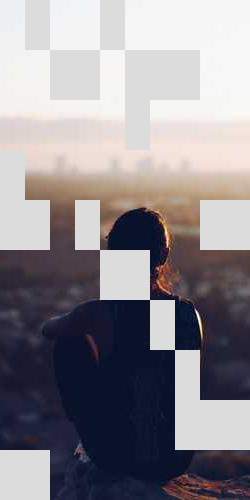

(7, 8)


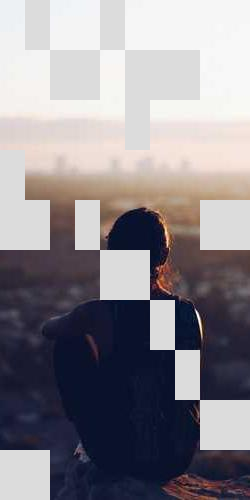

(3, 4)


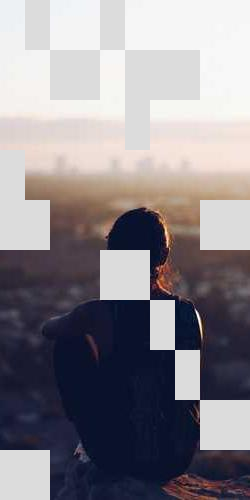

(9, 4)


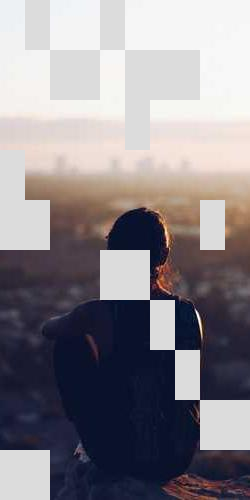

(6, 1)


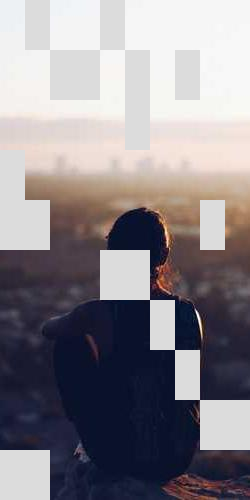

(5, 5)


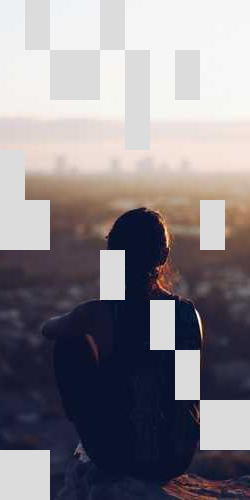

(4, 0)


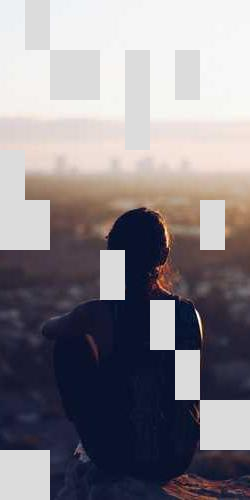

(5, 2)


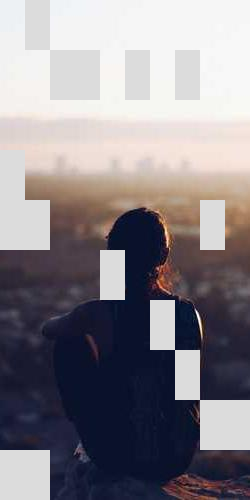

(6, 6)


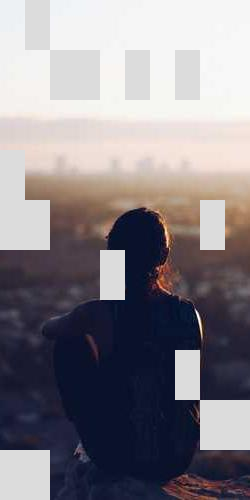

(5, 1)


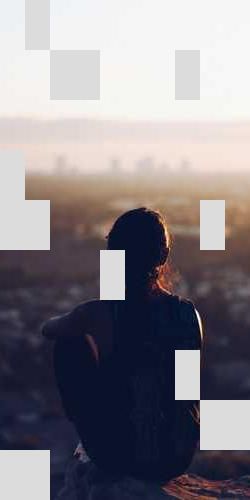

(1, 0)


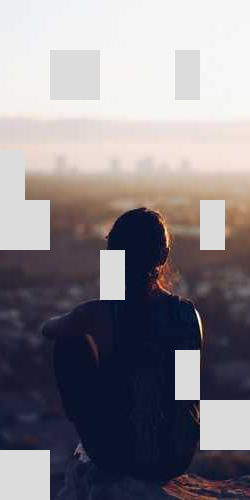

(1, 9)


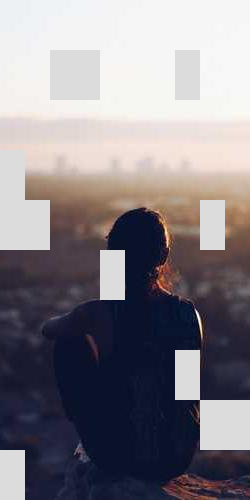

(4, 5)


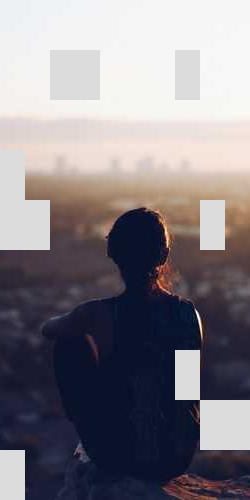

(8, 8)


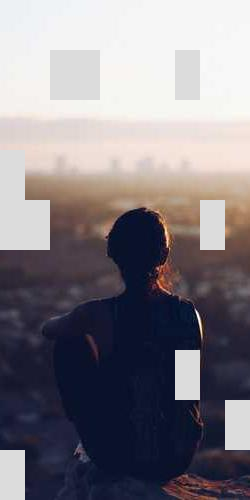

(8, 4)


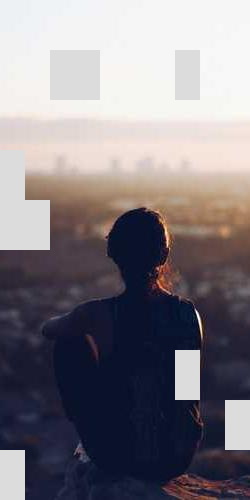

(1, 4)


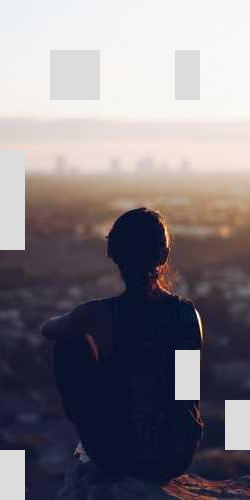

(0, 4)


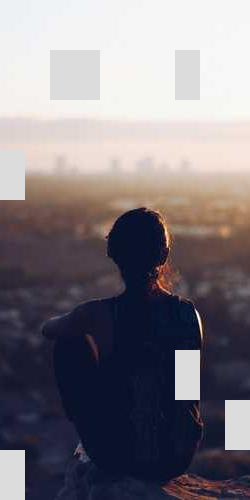

(7, 1)


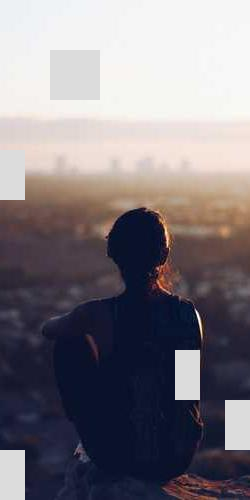

(9, 8)


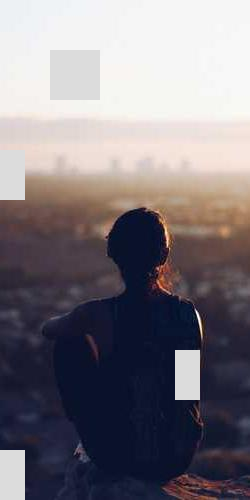

(3, 1)


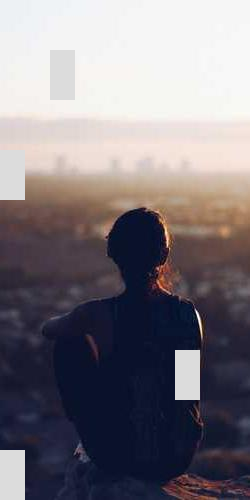

(0, 9)


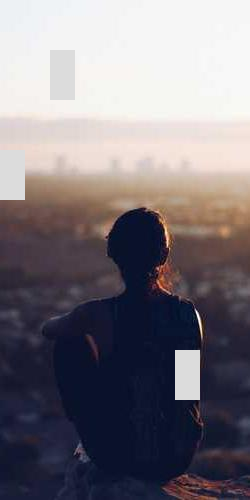

(2, 1)


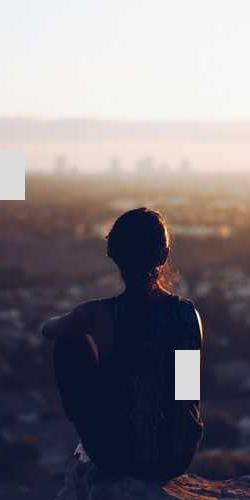

(7, 7)


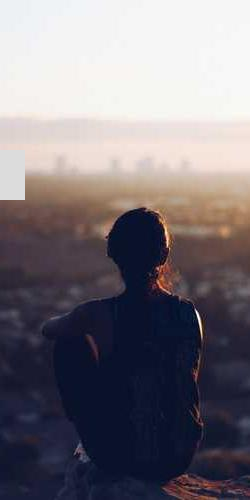

(0, 3)


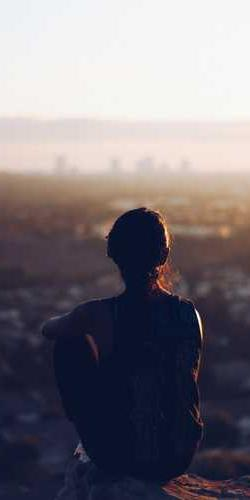

Puzzle resuelto


In [34]:
def jugar():
  """
  Pensemos en como se resuelve un puzzle en la vida real
  Vas eligiendo piezas de la bolsa y si encajan con alguna que ya tengas, las pones sobre el tablero.
  Si no, las pones a parte a la espera de poder emparejarlas.
  """

  # Cuál debería ser la dimensión del puzzle ??
  # Dejar solo definición
  dim = # COMPLETAR

  # Inicialización del tablero/puzzle y la bolsa/generador de piezas
  tablero = Tablero(dim)
  prod = generar_piezas(dim, tablero)

  # Guardamos aparte todas las piezas que hemos cogido, en pares {id: pieza}
  piezas_en_uso = {}


  # Mientras el puzzle no esté completo y haya piezas nuevas que comparar
  # Añadimos la nueva pieza a la bolsa de las que hemos visto
  # Si alguna pieza de las que hemos visto, es vecina de la nueva pieza, hacen pareja por lo que las podemos mostrar sobre el tablero

  # Quizás sea conveniente emplear algún método que has implementado antes y el de pintar que ofrece el tablero

  # COMPLETAR
  while (siguiente_pieza := next(prod)) is not None:
    piezas_en_uso[siguiente_pieza.id] = siguiente_pieza
    # COMPLETAR
    tablero.actualizar()

  if siguiente_pieza is None:
    print("Se han terminado las piezas antes de hora!")
  else:
    print("Puzzle resuelto")

jugar()